In [ ]:
%pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
!pip install nltk
%matplotlib inline

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.9 MB/s eta 0:00:00


In [ ]:
from sklearn import model_selection
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import Box

from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from gensim import corpora, models
from pprint import pprint

import nltk
#nltk.download()

import pandas as pd
from pandas.core.arrays.sparse import dtype
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

import string
import re

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import random

import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [ ]:

# load dataset
dp = pd.read_csv("depression_pre.csv")
anxiety = pd.read_csv("anxiety_pre.csv")
adhd = pd.read_csv("adhd_pre.csv")
ptsd = pd.read_csv("ptsd_pre.csv")
ed = pd.read_csv("ed_pre.csv")
bf = pd.read_csv("bf_pre.csv")
sw = pd.read_csv("SuicideWatch_post.csv")
bi = pd.read_csv("bipolar_pre.csv")
sch = pd.read_csv("schiz_pre.csv")

dp_post = pd.read_csv("depression_post.csv")
anxiety_post = pd.read_csv("anxiety_post.csv")
adhd_post = pd.read_csv("adhd_post.csv")
ptsd_post = pd.read_csv("ptsd_post.csv")
ed_post = pd.read_csv("EatingDisorders_post.csv")
bf_post = pd.read_csv("BrainFog_post.csv")
sw_post = pd.read_csv("SuicideWatch_post.csv")
bi_post = pd.read_csv("bipolar_post.csv")
sch_post = pd.read_csv("Schizophrenia_post.csv")

FileNotFoundError: ignored

In [8]:
dp = pd.read_csv("depression_pre.csv")
dp_post = pd.read_csv("depression_post.csv")

In [9]:
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

<ipython-input-9-59b8f8f9a04c>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
dp_all = dp.append(dp_post, ignore_index=True)
anx_all = anxiety.append(anxiety_post, ignore_index=True)
adhd_all = adhd.append(adhd_post, ignore_index=True)
ptsd_all = ptsd.append(ptsd_post, ignore_index=True)
ed_all = ed.append(ed_post, ignore_index=True)
bf_all = bf.append(bf_post, ignore_index=True)
sw_all = sw.append(sw_post, ignore_index=True)
bi_all = bi.append(bi_post, ignore_index=True)
sch_all = sch.append(sch_post, ignore_index=True)


In [10]:
dp_all = dp.append(dp_post, ignore_index=True)

<ipython-input-10-874b21d07da3>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dp_all = dp.append(dp_post, ignore_index=True)


In [ ]:
dp_all.info()
anx_all.info()
adhd_all.info()
ptsd_all.info()
ed_all.info()
bf_all.info()
sw_all.info()
bi_all.info()
sch_all.info()

In [ ]:
dp

In [11]:
dp_all["Post Text"].replace('[removed]', "", inplace = True)
dp_all['Post Length'] = dp_all['Post Text'].str.len()
dp_all

,Unnamed: 0,Title,Post Text,ID,Score,Upvote Ratio,Total Comments,Created On,Post URL,Original Content,Saved,year,month,Post Length
0,0,"Anyone else feel like their ""fake depressed""?","it's stupid, but i always doubt the fact i hav...",7tk5tf,2195,0.99,156,2018-01-28 13:12:11,https://www.reddit.com/r/depression/comments/7...,False,False,2018,1,621.0
1,1,Why don't you talk to us?,My parents keep asking me this question.\nToda...,7rrkf1,1652,0.99,136,2018-01-20 17:05:18,https://www.reddit.com/r/depression/comments/7...,False,False,2018,1,537.0
2,2,An old man killed my only way of coping with d...,- be me\n- have chronic depression and social ...,7t7c0h,1644,0.98,107,2018-01-26 20:18:05,https://www.reddit.com/r/depression/comments/7...,False,False,2018,1,826.0
3,3,Anyone just want to take a break from life and...,"That's all I want. I wanna go to a park, lay o...",7qwvjs,1403,0.99,104,2018-01-17 00:06:20,https://www.reddit.com/r/depression/comments/7...,False,False,2018,1,163.0
4,4,I had to fill out one of those depression test...,And I scored in the 'severe' range. This lead ...,7oydlq,1299,0.99,96,2018-01-08 13:05:09,https://www.reddit.com/r/depression/comments/7...,False,False,2018,1,331.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1,I can’t believe people are out here really liv...,Nobody’s life is perfect of course but fuck. H...,tnuq6t,1784,1.00,286,2022-03-25 18:14:13,https://www.reddit.com/r/depression/comments/t...,False,False,2022,3,311.0
796,2,I sometimes wish depression was as visible on ...,Just because I look okay doesn’t mean I’m not ...,tqdr6l,1338,1.00,58,2022-03-28 16:54:10,https://www.reddit.com/r/depression/comments/t...,False,False,2022,3,63.0
797,3,Staying awake to delay next day from coming,"Anyone else, instead of sleeping more when dep...",tlytvy,1211,1.00,125,2022-03-24 05:44:21,https://www.reddit.com/r/depression/comments/t...,False,False,2022,3,242.0
798,4,Sometimes i wish i could donate my life to som...,There are so many people in the world who want...,ttc7pn,1159,1.00,58,2022-03-31 23:02:58,https://www.reddit.com/r/depression/comments/t...,False,False,2022,3,207.0


In [12]:
dp_arima = dp_all.drop(columns= ['Unnamed: 0', 'Title', 'Post Text', 'ID', 'Post URL', 'Original Content', 'Saved', 'year', 'month'])

In [ ]:
dp_arima

In [ ]:
#dp_arima.rename(columns={"Created On": "Date"})

In [13]:
dp_arima['Created On'].dtypes

dtype('O')

In [14]:
dp_arima['Created On'] = pd.to_datetime(dp_arima["Created On"])

In [15]:
dp_arima['Date'] = dp_arima['Created On'].dt.date
dp_arima

,Score,Upvote Ratio,Total Comments,Created On,Post Length,Date
0,2195,0.99,156,2018-01-28 13:12:11,621.0,2018-01-28
1,1652,0.99,136,2018-01-20 17:05:18,537.0,2018-01-20
2,1644,0.98,107,2018-01-26 20:18:05,826.0,2018-01-26
3,1403,0.99,104,2018-01-17 00:06:20,163.0,2018-01-17
4,1299,0.99,96,2018-01-08 13:05:09,331.0,2018-01-08
...,...,...,...,...,...,...
795,1784,1.00,286,2022-03-25 18:14:13,311.0,2022-03-25
796,1338,1.00,58,2022-03-28 16:54:10,63.0,2022-03-28
797,1211,1.00,125,2022-03-24 05:44:21,242.0,2022-03-24
798,1159,1.00,58,2022-03-31 23:02:58,207.0,2022-03-31


In [16]:
log_dp_arima = np.log(dp_arima['Post Length'])

<Axes: >

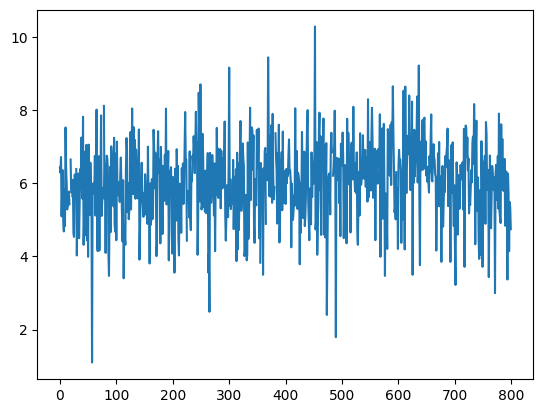

In [17]:
log_dp_arima.plot(x = 'Date', y = 'Post Length')

In [ ]:
dp_arima

In [19]:
msk = (log_dp_arima.index < len(log_dp_arima)-30)
df_train = log_dp_arima[msk].copy()
df_test = log_dp_arima[~msk].copy()

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
acf_org = plot_acf(df_train)
pacf_org = plot_pacf(df_train)

In [ ]:
train_diff = df_train.diff().dropna()
train_diff.plot()

In [ ]:
acf_org = plot_acf(train_diff)
pacf_org = plot_pacf(train_diff)

In [ ]:
import statsmodels.tsa.stattools as adfuller
from socket import socket

In [ ]:
adf_test = adfuller.adfuller(train_diff)
print(f'pvalue: {adf_test[1]}')

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order = (2,1,0))
model_fit = model.fit()
print(model_fit.summary())

In [ ]:
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title = 'Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

In [ ]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

In [ ]:
forecast_test = model_fit.forecast(len(df_test))
dp_arima['forecast_manual'] = [None]*len(df_train) + list(forecast_test)
dp_arima.plot(x = 'Date', y ='Post Length')
dp_arima.plot(x = 'Date', y ='forecast_manual')

In [21]:
import matplotlib.dates as mdates
import datetime as dt

now = dt.datetime.now()
then = now + dt.timedelta(days=100)
days = mdates.drange(now,then,dt.timedelta(days=1))

<ipython-input-22-eef1d2e5bc2f>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dp_arima.time = pd.to_datetime(dp_arima['Date'], format='%Y-%m-%d')


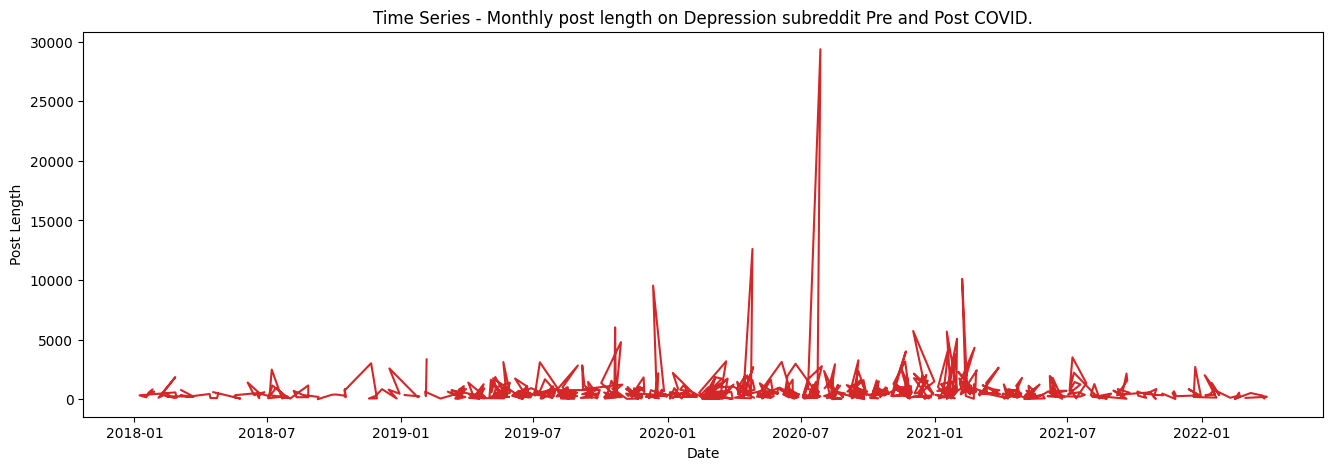

In [22]:
import matplotlib.pyplot as plt
dp_arima.time = pd.to_datetime(dp_arima['Date'], format='%Y-%m-%d')
dp_arima.set_index(['Date'],inplace=True)


def plot_df(df, x, y, title="", xlabel='Date', ylabel='Post Length', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(dp_arima, x=dp_arima.index, y=dp_arima['Post Length'], title='Time Series - Monthly post length on Depression subreddit Pre and Post COVID.')

In [23]:
target_column = 'Post Length'  # Adjust accordingly
y_actual = dp_arima[target_column]
y = log_dp_arima

# Handle missing values
y = y.dropna()

In [24]:
train_size = int(len(log_dp_arima) * 0.8)
train, test = y[:train_size], y[train_size:]

In [25]:
model = auto_arima(train, trace=True, suppress_warnings=True, seasonal=True)

# Make predictions on the test set
predictions, conf_int = model.predict(n_periods=len(test), return_conf_int=True)

# Evaluate the model
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2359.802, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2194.814, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2357.802, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2119.204, Time=0.28 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2064.494, Time=0.52 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2053.080, Time=0.56 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2040.362, Time=0.75 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.85 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.53 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=2038.365, Time=0.24 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=2051.081, Time=0.27 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=1951.101, Time=1.08 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1950.352, T

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


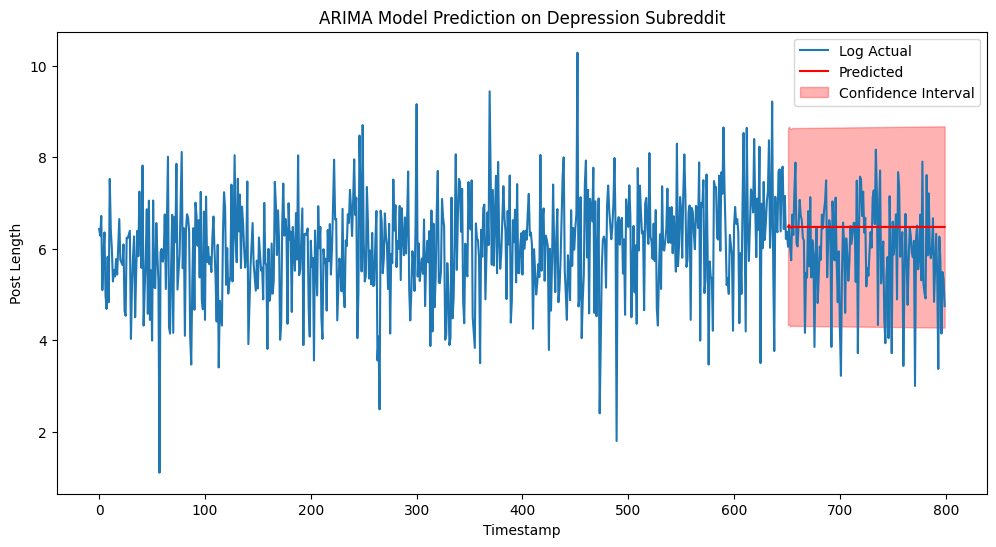

In [27]:
plt.figure(figsize=(12, 6))
#plt.plot(y_actual.index, y_actual, label='Actual')
plt.plot(y.index, y, label='Log Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='r', alpha=0.3, label='Confidence Interval')
plt.title('ARIMA Model Prediction on Depression Subreddit')
plt.xlabel('Timestamp')
plt.ylabel(target_column)
plt.legend()
plt.show()

In [ ]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
dp_arima['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)
dp_arima